# Сборный проект 1 - Стримчик

## Открытие файла с данными и изучение общей информации

### Описание
<br>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br><br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br><br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
Name — название игры
<br>Platform — платформа
<br>Year_of_Release — год выпуска
<br>Genre — жанр игры
<br>NA_sales — продажи в Северной Америке (миллионы проданных копий)
<br>EU_sales — продажи в Европе (миллионы проданных копий)
<br>JP_sales — продажи в Японии (миллионы проданных копий)
<br>Other_sales — продажи в других странах (миллионы проданных копий)
<br>Critic_Score — оценка критиков (максимум 100)
<br>User_Score — оценка пользователей (максимум 10)
<br>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Загрузка данных

In [188]:
# загружаем используемые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import scipy
from scipy import stats as st

In [189]:
# загрузим предоставленные данные

pth1 = '/datasets/games.csv'
pth2 = 'https://code.s3.yandex.net/datasets/games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [190]:
# Проверим, что получилось
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Все отлично. Сразу в глаза бросаются пропуски. 
<br>Например, отсутствие скора у игры Марио на Денди. 
<br> Но мы то все знаем, что Марио это "12 из 10".

<div>
<img src="https://i.ytimg.com/vi/7aTODAI64lE/maxresdefault.jpg" width="500"/>
</div>



In [191]:
# посмотрим все данные по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Замена названия столбцов

In [192]:
# попробуем посмотреть названия столбцов. Приведем их к единому формату.
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [193]:
# заменим "верблюжий" язык на "змеиный"
data.columns = data.columns.str.lower()

# проверим
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка столцов на пропуски

In [194]:
# посмотрим на датасет
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [195]:
# Посмотрим на данные "общими мазками" по числовым данным
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [196]:
# посмотрим на пропуски
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')



,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Выявлены пропуски в столбцах year_of_release, critic_score, user_score, rating. Ну текущем этапе сложно определить причину пропусков. Необходимо смотреть все столцы в отедльности. Попробуем это сделать.

In [197]:
# изучим поле name
data.name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [198]:
# узнаем количество представленных игр и объем игр
print(len(data.name.unique()))
print(len(data.name))

11560
16715


Исходя из различного количества уникальных строк и длины датасета, то в нем есть дубликаты.
ПОсмотрим причину и природу данных дубликатов.

Скорее всего игры выходили на различных платформах и даже на различных поколениях платформ. Поэтому удаление дубликатов необходимо делать уже после изучения других значений.

In [199]:
# посмотрим пропуски на name
data.name.isnull().sum()

2

In [200]:
# Что за пропуски:
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Там почти нет данных и возможно удалить эти строки.

Стоп! Подождите. Игра на Сеге Очень 1993 года. Это же легендарная The Flintstones.

In [201]:
# Надо проверить, что ее уже нет.
data.query('platform == "GEN" and year_of_release==1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [202]:
# Найдем, как эта игра пишется в других записях. Одна должна содержать подстроку Flintstones.
data.query('name.notnull()').query('name.str.contains("Flintstones")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9396,The Flintstones: Bedrock Bowling,PS,2000.0,Sports,0.07,0.05,0.0,0.01,NaN,NaN,NaN
14364,The Flintstones: Big Trouble in Bedrock,GBA,2001.0,Platform,0.02,0.01,0.0,0.00,NaN,NaN,NaN


In [203]:
# можно сделать вывод, что после 1993 выходили только дополнения и возможно их добавить только как "The Flintstones".
# Для этого объеденим эти две строки (игры) в одну игру. Скорре всего пропуски образовались по причине неидентификации данной игры.
data_for_flintstones = data[data.name.isnull()]
data_for_flintstones


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [204]:
# объединим данные строки в одну, объединяя только те строки, которые пропущены
data_for_flintstones = data_for_flintstones.max().to_frame().T
data_for_flintstones

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,None,GEN,1993.0,None,1.78,0.53,0.03,0.08,NaN,None,None


In [205]:
# присвоим name
data_for_flintstones.loc[data_for_flintstones.name.isnull(), 'name'] = 'The Flintstones'
data_for_flintstones

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,The Flintstones,GEN,1993.0,None,1.78,0.53,0.03,0.08,NaN,None,None


In [206]:
# добавим данную строку в исходый датафрейм
data = data.append(data_for_flintstones, ignore_index=True)
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,0.01,0.0,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16715,The Flintstones,GEN,1993.0,None,1.78,0.53,0.03,0.08,NaN,None,None


In [207]:
# удалим лишние name
data = data.query('name.notnull()')

# и проверим
data.shape

(16714, 11)

In [208]:
# изучим поле platform
data.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [209]:
data.platform.isnull().sum()

0

Смутила платформа 2600. Но после изучения платформ, оказалось, что это легендарная Atari. В этих столбцах все отлично.

In [210]:
# изучим поле year_of_release
data.year_of_release.unique()

array([2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0,
       1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0,
       2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0,
       1993.0, 1994.0, 1982.0, 2016.0, 2003.0, 1986.0, 2000.0, nan,
       1995.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0], dtype=object)

In [211]:
# тоже есть Nun. Сколько их?
data.year_of_release.isnull().sum()

269

Такое огромное количество значений невозможно в разумные сроки обработать. Придется делать с определенными допущениями.

In [212]:
# Посмотрим на эти данные
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.8,0.97,0.0,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.0,0.0,0.0,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.0,0.0,0.0,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.0,0.0,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN


In [213]:
# посмотрим типы данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16715
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16714 non-null  object
 1   platform         16714 non-null  object
 2   year_of_release  16445 non-null  object
 3   genre            16713 non-null  object
 4   na_sales         16714 non-null  object
 5   eu_sales         16714 non-null  object
 6   jp_sales         16714 non-null  object
 7   other_sales      16714 non-null  object
 8   critic_score     8137 non-null   object
 9   user_score       10014 non-null  object
 10  rating           9949 non-null   object
dtypes: object(11)
memory usage: 1.5+ MB


In [214]:
# какие есть вараинты для возможной замены, но перед этим сделаем тип данных int
data_year_of_release = data.query('year_of_release.notnull()')
data_year_of_release.year_of_release = data_year_of_release.year_of_release.astype('int')
pivot_year = data_year_of_release.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max', 'mean'])
pivot_year.columns = ['min', 'max', 'mean']
#pivot_year.mean.astype(int)
pivot_year.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,min,max,mean
platform,,,
2600,1980,1989,1982.137931
3DO,1994,1995,1994.666667
3DS,2011,2016,2013.126953
DC,1998,2008,1999.942308
DS,1985,2013,2008.185290


In [215]:
# заменим Nan на нулевые значения в data и проверим, что из этого получилось
data.year_of_release = data.year_of_release.fillna('0')
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [216]:
# все отлично. Переведем год релиза теперь и в data.
data.year_of_release = data.year_of_release.astype(int)

# и проверим это
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16715
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16714 non-null  object
 1   platform         16714 non-null  object
 2   year_of_release  16714 non-null  int64 
 3   genre            16713 non-null  object
 4   na_sales         16714 non-null  object
 5   eu_sales         16714 non-null  object
 6   jp_sales         16714 non-null  object
 7   other_sales      16714 non-null  object
 8   critic_score     8137 non-null   object
 9   user_score       10014 non-null  object
 10  rating           9949 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


In [217]:
# Все получилось. Супер!
# Здесь можно заменить минимальным значением по каждой платформе из ранее созданной таблицы pivot_year
for i in data.index:
    if data.loc[i, 'year_of_release'] == 0:
        #print(i, data.loc[i, 'platform'], data.loc[i, 'year_of_release'])
        #print(pivot_year.loc[data.loc[i, 'platform'], 'mean'])
        #print('-----')
        data.loc[i, 'year_of_release'] = pivot_year.loc[data.loc[i, 'platform'], 'mean']

In [218]:
# Проверем корректность замены
data.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Все отлично заменилось. Идем дальше.

In [219]:
# посмотрим на уникальные значения в столбце "rating"
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP', None],
      dtype=object)

In [220]:
# Сразу бросается в глаза то, что есть Nan и None. Также есть дублирующиеся возрастные рейтинги.
# Заменим тождественные рейтинги K-A и E.
data.rating = data.rating.fillna('na')
data.rating = data['rating'].replace('K-A','E')

# и проверим
data.rating.isna().sum()

0

In [221]:
# Давайте посмотрим распределение всех рейтингов в таблице.
data.groupby('rating')['rating'].count()

rating
AO         1
E       3993
E10+    1420
EC         8
M       1563
RP         3
T       2961
na      6765
Name: rating, dtype: int64

In [222]:
# очень мало данных по группам "AO", "RP", "EC". Посмотрим на эти данные
data.query('rating in ("AO", "RP", "EC")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005.000000,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO
4297,Nickelodeon Team Umizoomi,DS,2011.000000,Action,0.42,0.0,0.0,0.03,NaN,tbd,EC
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010.000000,Misc,0.35,0.0,0.0,0.02,NaN,tbd,EC
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010.000000,Misc,0.27,0.0,0.0,0.02,NaN,tbd,EC
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005.000000,Adventure,0.12,0.09,0.0,0.03,NaN,7,EC
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.000000,Misc,0.19,0.0,0.0,0.01,NaN,tbd,EC
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005.000000,Adventure,0.09,0.02,0.0,0.0,NaN,tbd,EC
13065,Sesame Street: Cookie's Counting Carnival,PC,2010.000000,Misc,0.05,0.0,0.0,0.0,NaN,tbd,EC
13455,Sesame Street: Elmo's A-to-Zoo Adventure,PC,2010.000000,Misc,0.04,0.0,0.0,0.0,NaN,tbd,EC
13672,Clockwork Empires,PC,2008.914316,Strategy,0.0,0.04,0.0,0.0,58.0,3.8,RP


In [223]:
data.groupby('rating')['rating'].count()

rating
AO         1
E       3993
E10+    1420
EC         8
M       1563
RP         3
T       2961
na      6765
Name: rating, dtype: int64

Классификация рейтингов по ESRB:
    <br>- EC — Early Childhood
    <br>- E — Everyone
    <br>- E10+ — Everyone 10+
    <br>- T — Teen
    <br>- M — Mature
    <br>- AO — Adults Only
    <br>- RP — Rating Pending
<br>Попробуем заменить Adults Only на Mature, Early Childhood на Everyone, Rating Pending на na

In [224]:
data.rating = data.rating.replace('AO', 'M')
data.rating = data.rating.replace('EC', 'E')
data.rating = data.rating.replace('RP', 'na')

# проверим, что из этого получилось
data.groupby('rating')['rating'].count()

rating
E       4001
E10+    1420
M       1564
T       2961
na      6768
Name: rating, dtype: int64

Все отлично заменилось. Идем дальше...

In [225]:
# посмотрим на user_score
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7', None],
      dtype=object)

In [226]:
# заменим tbd и nan на значение NA. По свой сути они очень похожи. Это игроки непожелавшие оставить мнение об игре по различным причинам
data['user_score'] = data['user_score'].replace('tbd', 'na')
data['user_score'] = data['user_score'].fillna('na')

# и проверим
data['user_score'].unique()

array(['8', 'na', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [227]:
# теперь заменим пропуски на Nan
data['user_score'] = data['user_score'].replace('na', np.NaN)

# и проверим
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [228]:
# заменим тип на числовой
data=data.astype({'user_score':'float64'})
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Все заменилось. Идем дальше...

In [229]:
# изучение скоров критиков - critic_score

data['critic_score'].unique()

array([76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0, 61.0, 97.0, 95.0,
       77.0, 88.0, 83.0, 94.0, 93.0, 85.0, 86.0, 98.0, 96.0, 90.0, 84.0,
       73.0, 74.0, 78.0, 92.0, 71.0, 72.0, 68.0, 62.0, 49.0, 67.0, 81.0,
       66.0, 56.0, 79.0, 70.0, 59.0, 64.0, 75.0, 60.0, 63.0, 69.0, 50.0,
       25.0, 42.0, 44.0, 55.0, 48.0, 57.0, 29.0, 47.0, 65.0, 54.0, 20.0,
       53.0, 37.0, 38.0, 33.0, 52.0, 30.0, 32.0, 43.0, 45.0, 51.0, 40.0,
       46.0, 39.0, 34.0, 35.0, 41.0, 36.0, 28.0, 31.0, 27.0, 26.0, 19.0,
       23.0, 24.0, 21.0, 17.0, 22.0, 13.0, nan], dtype=object)

Выводы:
Причиной пропусков стало фактическое отсутствие анализа рейтингов по определенным играм. Также возможно отсутствие желания устанвки рейтинга.
В данном дата-сете очень старые игры. Поэтому часть информации возможно могла и не логироваться.

In [230]:
# Подсчет суммарных продаж по всем регионам
col_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['total_sales'] = data[col_list].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,na,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,na,31.38


Вывод:
<br>В датасете имелись пропуски. По незначительным пропускам (например, Название игры) проупски были восстановлены. По значительным пропускам (например, скоры пользователей и скоры критиков) не восстанавливались. Пропуске по возрастному ограничение были объединены в ближайшие возрастные категории.

### Замена типов данных

In [231]:
# Посмотрим какие типы данных есть
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16715
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16714 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16714 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16714 non-null  object 
 5   eu_sales         16714 non-null  object 
 6   jp_sales         16714 non-null  object 
 7   other_sales      16714 non-null  object 
 8   critic_score     8137 non-null   object 
 9   user_score       7590 non-null   float64
 10  rating           16714 non-null  object 
 11  total_sales      16714 non-null  float64
dtypes: float64(3), object(9)
memory usage: 2.2+ MB


In [232]:
# обработаем столбцев 
data.year_of_release = data.year_of_release.round()
data = data.astype({'year_of_release':'int'})

In [233]:
data = data.astype({'na_sales':'float64',
                  'eu_sales':'float64',
                  'jp_sales':'float64',
                  'other_sales':'float64',
                  'critic_score':'float64',
                 }
                )
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16715
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16714 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16714 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16714 non-null  object 
 11  total_sales      16714 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


## Исследовательский анализ данных

### Зависимость количества игр от года выпуска

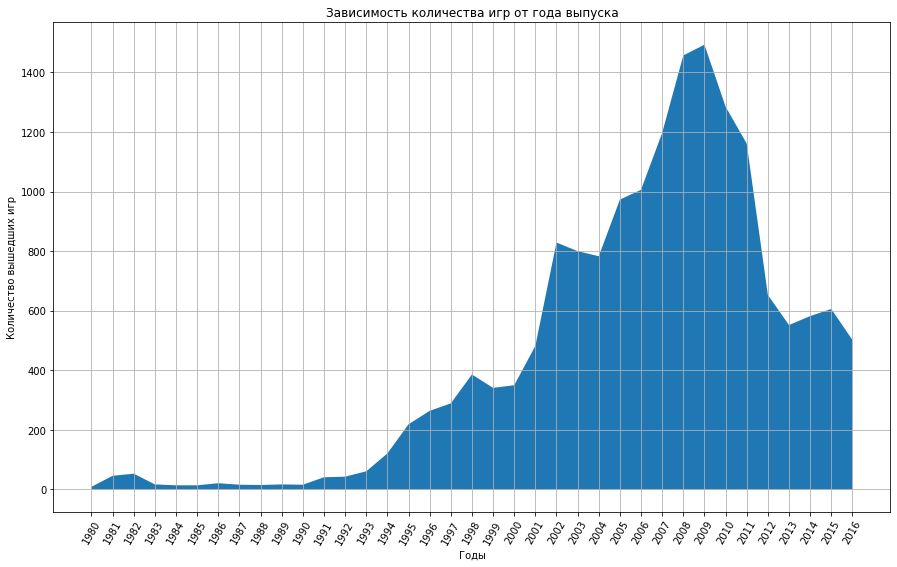

In [234]:
data_year = data.groupby('year_of_release').agg(games=('name', 'count')).reset_index()
plt.figure(figsize=(15, 9));
plt.grid();
plt.fill_between(data_year['year_of_release'], data_year['games']);
plt.xticks(np.arange(data_year['year_of_release'].min(), data_year['year_of_release'].max()+1, 1));
plt.xticks(rotation = 60);
plt.xlabel("Годы");
plt.ylabel("Количество вышедших игр");
plt.title('Зависимость количества игр от года выпуска');

plt.show()

Данные не за все годы важны в данном случае.ПРимерно 400 игр было в 1998 году.

### Зависимость объемов продаж от года релиза

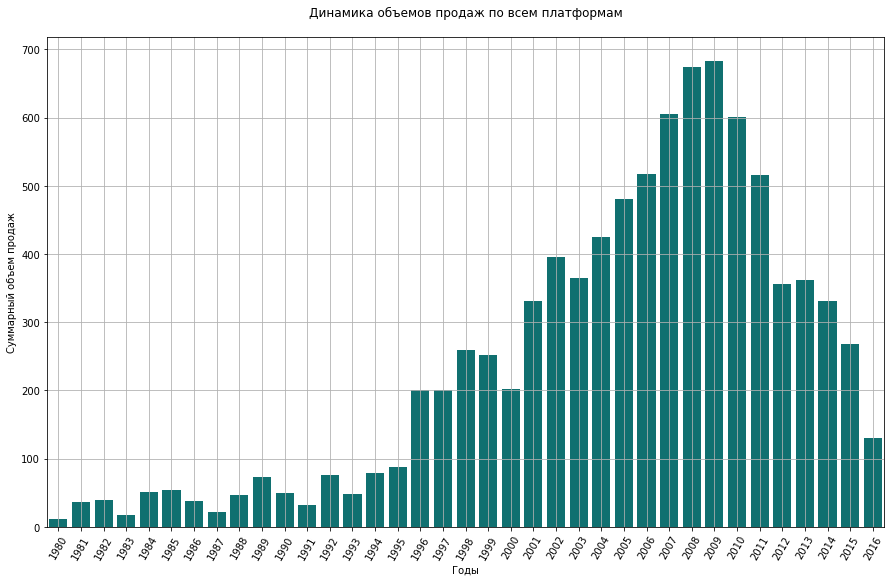

In [235]:
# Посмотрим разбивку по платформам
data_sales = data.groupby('year_of_release').agg(sales=('total_sales', 'sum')).reset_index()

plt.figure(figsize=(15, 9));
plt.title('Динамика объемов продаж по всем платформам\n');
plt.xticks(np.arange(data_sales['year_of_release'].min(), data_sales['year_of_release'].max()+1, 1));
sns.barplot(data=data_sales, x='year_of_release', y='sales', color='teal');
plt.xticks(rotation = 60);
plt.xlabel("Годы");
plt.ylabel("Суммарный объем продаж");
plt.grid(True)
plt.show();

На графике видны провалы. Возможно они сязаны с кризисными годами, в которые мало покупались игры.

In [236]:
# Какие платформы были наиболее успешными:
data_platform_top = data.groupby('platform').agg(sales=('total_sales', 'sum')).\
                    sort_values(by='sales',ascending=False).reset_index()
data_platform_top[:10]

,platform,sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


По датафрейму видно, на какий платформе больше всего выпускалось игр. И почему вторая плойка стала легендой.

### Прибыльность платформ

In [237]:
# Выберем наиболее прибыльные платформы. Прибыльность будем определять по тотал-сале. 

#оставляем данныетолько за 2012-2016 годы
data_new = data.query('year_of_release > 2011')

data_new_sales = data_new.groupby('platform').agg(sales=('total_sales', 'sum')).\
                sort_values(by='sales',ascending=False).reset_index()
data_new_sales[:10]

,platform,sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,195.80
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.44
8,Wii,35.37
9,DS,12.55


Здесь видно, что платформы от Sony находятся в авангарде.

In [238]:
# посмотрим, какие платформы являются перспективными из авангардных

data_new_platform=data_new.groupby(['platform','year_of_release']).agg(sales=('total_sales', 'sum')).reset_index()
data_new_top=data_new_sales[:11]

for platform in data_new_top['platform'].unique():
    data_plat=data_new_platform[data_new_platform['platform'] == platform].drop('platform', axis=1)
    print(platform)
    print(data_plat)
    print('---------------------------')

PS4
    year_of_release   sales
17             2013   25.99
18             2014  100.00
19             2015  118.90
20             2016   69.25
---------------------------
PS3
    year_of_release   sales
12             2012  107.36
13             2013  113.25
14             2014   47.76
15             2015   16.82
16             2016    3.60
---------------------------
X360
    year_of_release  sales
40             2012  99.74
41             2013  88.58
42             2014  34.74
43             2015  11.96
44             2016   1.52
---------------------------
3DS
   year_of_release  sales
0             2012  51.36
1             2013  57.76
2             2014  43.76
3             2015  27.78
4             2016  15.14
---------------------------
XOne
    year_of_release  sales
45             2013  18.96
46             2014  54.07
47             2015  60.14
48             2016  26.15
---------------------------
WiiU
    year_of_release  sales
35             2012  17.56
36             201

Очевидно, что потенциальный рост возможен у платформ последнего поколения (без ПК-бояр). С таким относится четвертая плойка и Экс-уан.
Очень расстраивает ПК =(

### Ящики с усами по глобальным продажам игр в разбивке по платформам

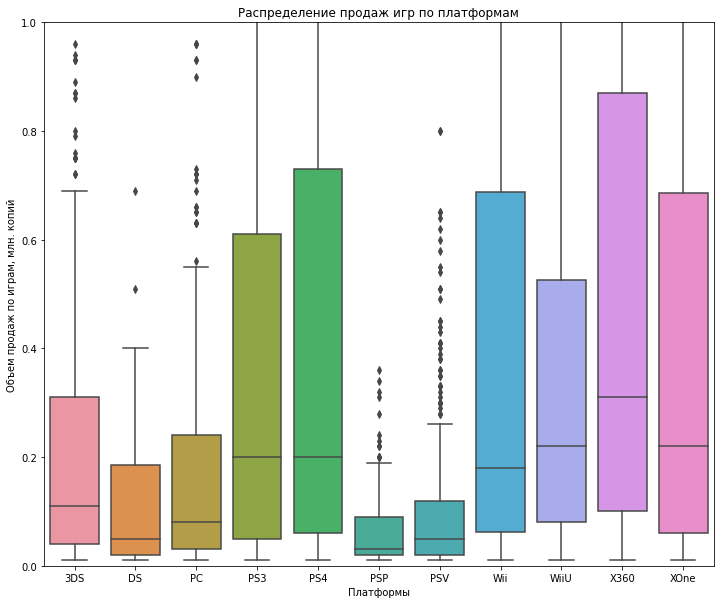

In [239]:
# Построим ящик с усами и проанализируем его:
data_new.head()
data_platform_sales=data_new.groupby(['platform','name']).agg(sales=('total_sales','sum')).reset_index()

plt.figure(figsize=(12, 10));
ax=sns.boxplot(x = data_platform_sales["platform"], y = data_platform_sales["sales"] )
ax.set(ylim=(0,1))

plt.xlabel("Платформы");
plt.ylabel("Объем продаж по играм, млн. копий");
plt.title('Распределение продаж игр по платформам')
plt.show();

Вывоод: по 75% квантилю видно, что наиболее дорогой является платформа x360. 
Приимерно одинаковые показатели получаются у XOne, Wii, PS4. Очень дорогие тайтлы есть у многих платформ.

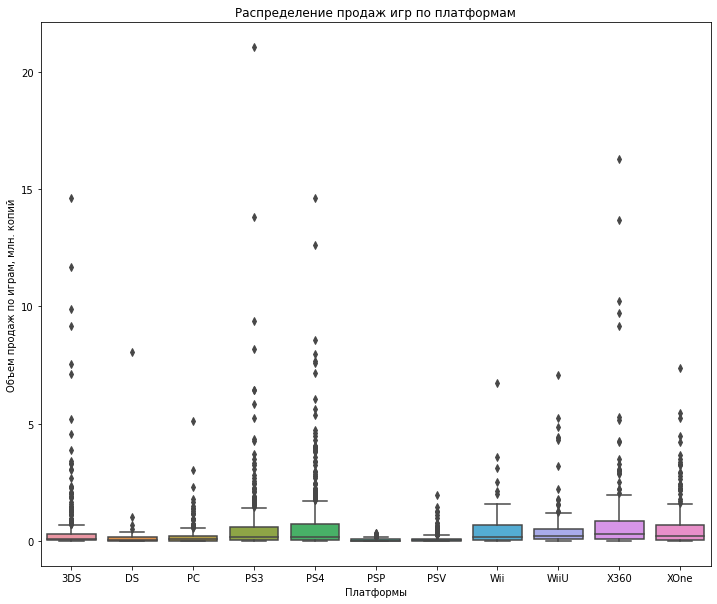

In [240]:
# Построим боксплот, чтобы посмотреть максимальные значения суммы. Будет плохо видно, что получем представление.
data_new.head()
data_platform_sales=data_new.groupby(['platform','name']).agg(sales=('total_sales','sum')).reset_index()

plt.figure(figsize=(12, 10));
ax=sns.boxplot(x = data_platform_sales["platform"], y = data_platform_sales["sales"] )
ax.set()

plt.xlabel("Платформы");
plt.ylabel("Объем продаж по играм, млн. копий");
plt.title('Распределение продаж игр по платформам')
plt.show();

### Влияение на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Рассмотрим продажи на примере платформы MS XOne.

In [241]:
#делаем срез по платформе XOne
data_one = data_new.query('platform == "XOne"')
data_one.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,na,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [242]:
# Посмотрим корреляцию общих продаж и отзывов купленных критиков
print('Корреляция глобальных продаж и отзывов критиков:', 
      '{:.2f}'
      .format(data_one['total_sales']
    .corr(data_one['critic_score'])))

Корреляция глобальных продаж и отзывов критиков: 0.42


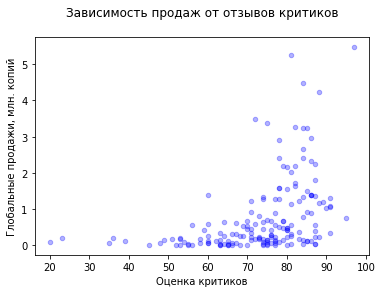

In [243]:
data_one.plot(x='critic_score', 
              y='total_sales',
              kind='scatter',
              alpha=0.3,
              c = 'b',
              s = 20);
plt.xlabel('Оценка критиков'); 
plt.ylabel('Глобальные продажи, млн. копий');
plt.title('Зависимость продаж от отзывов критиков\n');
plt.show();

In [244]:
#смотрим взаимосвязть продаж и оценок пользователей
print('\nКорреляция глобальных продаж и отзывов пользователей:', 
      '{:.2f}'.format(data_one['total_sales'].corr(data_one['user_score'])))


Корреляция глобальных продаж и отзывов пользователей: -0.07


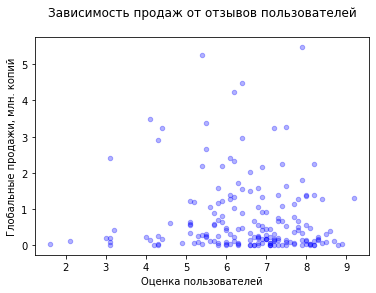

In [245]:
data_one.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, c = 'b', s = 20);
plt.xlabel('Оценка пользователей');
plt.ylabel('Глобальные продажи, млн. копий');
plt.title('Зависимость продаж от отзывов пользователей\n');

Выводы: 

In [246]:
data_platform_user=data_new.groupby('platform')['user_score'].count()
data_platform_critic=data_new.groupby('platform')['critic_score'].count()
data_platform=data_new.groupby('platform')[['critic_score', 'user_score', 'total_sales']].corr()

data_platform = data_platform.rename_axis(("platform", "corr_type"))
data_platform=data_platform.query('corr_type != "critic_score" & corr_type != "user_score"')
data_platform=data_platform.drop(['total_sales'],axis=1)
data_platform=data_platform.droplevel('corr_type')
data_platform=data_platform.rename(columns={'critic_score':'critic_corr', 'user_score':'user_corr'})

data_platform=data_platform.merge(data_platform_critic, on='platform',how='left')
data_platform=data_platform.merge(data_platform_user, on='platform',how='left')
data_platform=data_platform.rename(columns={'critic_score':'critic_count', 'user_score':'user_count'})

display(data_platform.style.format({'critic_corr':'{:.2f}','user_corr':'{:.2f}'}))

,critic_corr,user_corr,critic_count,user_count
platform,,,,
3DS,0.32,0.20,106,117
DS,nan,0.88,1,3
PC,0.24,-0.12,198,206
PS3,0.33,-0.01,214,283
PS4,0.41,-0.03,252,257
PSP,nan,-0.80,1,4
PSV,0.09,-0.00,108,131
Wii,-0.42,0.30,5,17
WiiU,0.35,0.40,90,100


Не стоит рассматривать корреляцию с низкими количеством оценок (DS, PSP, Wii). Высокая / очень высокая корреляция отсутствуют

### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

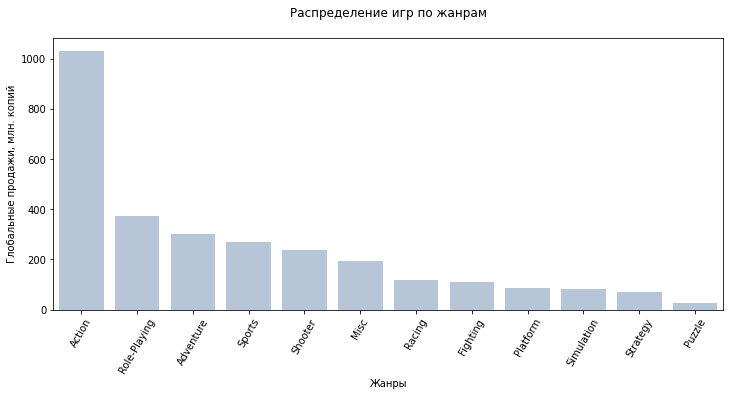

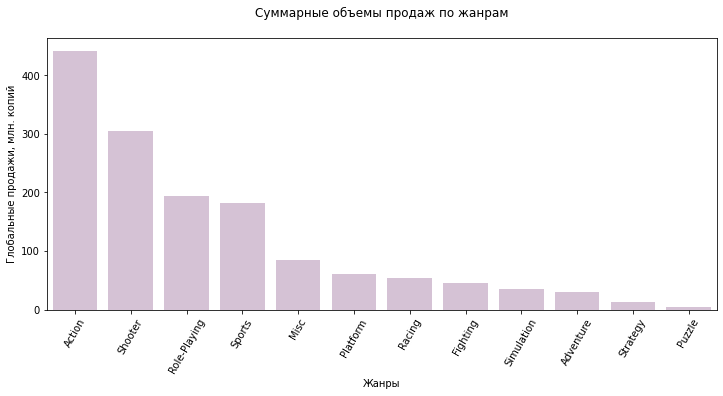

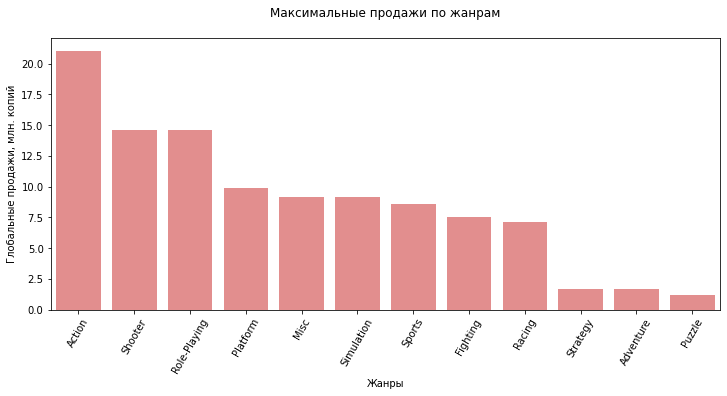

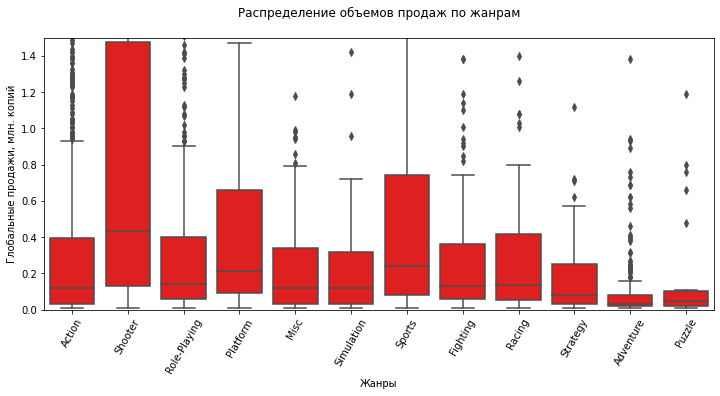

In [247]:
func_list=['count','sum','max']
title_list=['Распределение игр по жанрам\n','Суммарные объемы продаж по жанрам\n','Максимальные продажи по жанрам\n']
color_list=['lightsteelblue','thistle','lightcoral']
for i in range(3):
    data_genre=data_new.groupby('genre')['total_sales'].agg(func_list[i]).reset_index().sort_values('total_sales', ascending=False)
    plt.figure(figsize=(12, 5));
    sns.barplot(x=data_genre['genre'], y=data_genre['total_sales'], color=color_list[i])
    plt.xlabel('Жанры');
    plt.ylabel('Глобальные продажи, млн. копий');
    plt.title(title_list[i]);
    plt.xticks(rotation = 60);
    plt.show();

    
# построим бокс-плот по жанрам    
data_genre=data_new.groupby('genre')['total_sales'].median().reset_index().sort_values('total_sales', ascending=False)
plt.figure(figsize=(12, 5));
ax=sns.boxplot(x=data_new['genre'], y=data_new['total_sales'], color='red', )
ax.set(ylim=(0,1.5))
plt.xlabel('Жанры');
plt.ylabel('Глобальные продажи, млн. копий');
plt.title('Распределение объемов продаж по жанрам\n');
plt.xticks(rotation = 60);
plt.show();

Выводы:
<br> Максимальные продажи приходится на Action. Елси брать медианное значение, то здесь максимум пришелся на Шутеры. 

## Портрет пользователя каждого региона

### Топ платфом для определенных регионов

#### Северная Америка

In [248]:
data_na = data_new.groupby('platform')['na_sales'].sum().reset_index().\
                            sort_values('na_sales', ascending=False).reset_index(drop=True)
data_na = data_na.append({'platform':'другие','na_sales': sum(data_na.loc[5:10,'na_sales'])}, ignore_index=True)\
                        .drop(index=[5,6,7,8,9,10])
data_na

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,56.15
11,другие,90.48


#### Япония

In [249]:
data_jp=data_new.groupby('platform')['jp_sales'].sum().reset_index().\
                            sort_values('jp_sales', ascending=False).reset_index(drop=True)
data_jp=data_jp.append({'platform':'другие','jp_sales': sum(data_jp.loc[5:10,'jp_sales'])}, ignore_index=True)\
                        .drop(index=[5,6,7,8,9,10])

data_jp

,platform,jp_sales
0,3DS,87.84
1,PS3,35.29
2,PSV,21.11
3,PS4,15.96
4,WiiU,13.01
11,другие,19.49


#### Европа

In [250]:
data_eu=data_new.groupby('platform')['eu_sales'].sum().reset_index().\
                            sort_values('eu_sales', ascending=False).reset_index(drop=True)
data_eu=data_eu.append({'platform':'другие','eu_sales': sum(data_eu.loc[5:10,'eu_sales'])}, ignore_index=True)\
                        .drop(index=[5,6,7,8,9,10])
data_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.85
11,другие,90.17


Выводы:
<br> Для указанных в задании стран топовые платформы отличаются по продажам.
<br> Здесь все логично и не надо выдумывать. Япония любит Ниндендо 3ДС. Тут популярность связана с менталитетом и любовью к маленьким консолям.
<br> Европа и Северная Америка. Там места много в квартирах - Майкрософт и Сони. Но благодаря ценовой политике Майкрософт обошла в продажах Сони. В Европе лидирует Сони.

### Топ5 популярных жанров

#### Северная Америка

In [251]:
data_na=data_new.groupby('genre')['na_sales'].sum().reset_index().\
                            sort_values('na_sales', ascending=False).reset_index(drop=True)
data_na=data_na.append({'genre':'другие','na_sales': sum(data_na.loc[5:10,'na_sales'])}, ignore_index=True)\
                        .drop(index=[5,6,7,8,9,10,11])
data_na

,genre,na_sales
0,Action,178.02
1,Shooter,144.81
2,Sports,81.53
3,Role-Playing,64.11
4,Misc,38.19
12,другие,84.13


#### Япония

In [252]:
data_jp=data_new.groupby('genre')['jp_sales'].sum().reset_index().\
                            sort_values('jp_sales', ascending=False).reset_index(drop=True)
data_jp=data_jp.append({'genre':'другие','jp_sales': sum(data_jp.loc[5:10,'jp_sales'])}, ignore_index=True)\
                        .drop(index=[5,6,7,8,9,10,11])
data_jp

,genre,jp_sales
0,Role-Playing,65.54
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
12,другие,39.51


#### Европа

In [253]:
data_eu=data_new.groupby('genre')['eu_sales'].sum().reset_index().\
                            sort_values('eu_sales', ascending=False).reset_index(drop=True)
data_eu=data_eu.append({'genre':'другие','eu_sales': sum(data_eu.loc[5:10,'eu_sales'])}, ignore_index=True)\
                        .drop(index=[5,6,7,8,9,10,11])
data_eu

,genre,eu_sales
0,Action,159.53
1,Shooter,113.49
2,Sports,69.09
3,Role-Playing,48.58
4,Racing,27.29
12,другие,87.70


Выводы
<br>
В Японии больше продаются именно RPG. Скорре всего в эту групп попадают как RPG, так и JRPG. Прохождение и подход к игре объясняется поговоркой - У самурая нет цели, есть только путь.
<br> Америках и Европах все гораздо проще - Action!

### Влияние рейтинга на продажи

/tmp/ipykernel_32/446216880.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_esrb=data_new.groupby('rating')['na_sales','jp_sales','eu_sales'].sum().reset_index()


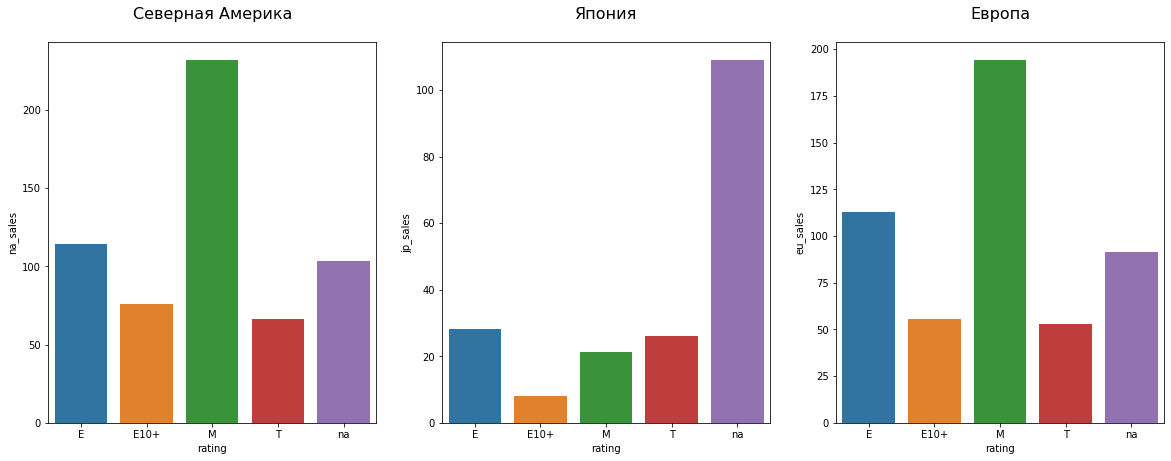

In [254]:
fig, ax= plt.subplots(1,3, figsize =(20, 7));
data_esrb=data_new.groupby('rating')['na_sales','jp_sales','eu_sales'].sum().reset_index()

sns.barplot(data=data_esrb,x='rating',y='na_sales',ax=ax[0])
ax[0].set_title('Северная Америка\n', fontsize=16);
sns.barplot(data=data_esrb,x='rating',y='jp_sales',ax=ax[1])
ax[1].set_title('Япония\n', fontsize=16);
sns.barplot(data=data_esrb,x='rating',y='eu_sales',ax=ax[2])
ax[2].set_title('Европа\n', fontsize=16);
plt.show();

По Японии сложно определить влияние рейтинга и продажи. По данному рейтингу данные отсутствуют. Если брать Европу и Америку, то здесь значительное преобладание рейтинга от 18 лет. Распраделение одинаковое.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [255]:
data_xone=data_new.query('platform == "XOne"')['user_score'].dropna()
data_pc=data_new.query('platform == "PC"')['user_score'].dropna()

print("\nРазмер выборки по Xbox One:", len(data_xone))
print("Размер выборки по PC:", len(data_pc), "\n\n")

alpha = .05 # критический уровень статистической значимости

results = scipy.stats.ttest_ind(data_xone, data_pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу\n")
else:
    print("Не получилось отвергнуть нулевую гипотезу\n") 


Размер выборки по Xbox One: 182
Размер выборки по PC: 206 


p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу



H0 -  средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.
<br>H1 - средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.
<br>p-value взяли здесь 0,05. Учитывая, что не равно, то сохраняем значение равное 0,05.
<br>ЗНачение получилось значительным. Значит нулевая гипотеза не отвергается (средний пользовательский рейтинг на платформе XOne равен ПК).           

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [256]:
data_action=data_new.query('genre == "Action"')['user_score'].dropna()
data_sports=data_new.query('genre == "Sports"')['user_score'].dropna()

print("\nРазмер выборки по жанру Action:", len(data_action))
print("Размер выборки по жанру Sports:", len(data_sports), "\n\n")

alpha = .05 # критический уровень статистической значимости

results =scipy.stats.ttest_ind(data_action, data_sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу\n")
else:
    print("Не получилось отвергнуть нулевую гипотезу\n") 


Размер выборки по жанру Action: 524
Размер выборки по жанру Sports: 195 


p-значение: 4.305337670692197e-20
Отвергаем нулевую гипотезу



H0 -  средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.
<br> H1 - средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.
<br>Значение p-value получилось очень низким (ниже заданного). Отвергаем нулевую гипотезу. Средний пользовательский рейтинг жанра Экшн не равер среднему по Спортсу.

## Выводы

* Развитие игровой индустриии началось больше с 98 года. Рост игр был до кризисного 2008 год. 
* Лидерами по продажам являются консоли. Лидерами в впоследние годы являются PS и Xbox.
* Переод жизни консоли примерно 5 лет. После этого выходят новые консоли от этих же производителей. В ПК ситуация иная.
* Лидерами среди консолей являются флагманские коробки PS4 и XOne. Следующее поколение еще неуспело продать большой объем.
* Отсутствует связть между скорами (как критиков, так и пользователей) с объемом продаж.
* Портреты проданных игр в Америке и Европе похожи. В Японии отличаются.
* На Японском рынке любили консоли Ниндендо в то время как Америке и Европе Сони и Майкрософт.
* Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC
* Средний пользовательский рейтинг жанра Экшн не равер среднему по Спортсу.